In [11]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("../events.db")

df = pd.read_sql_query(
    "SELECT * FROM events",
    conn
)

df.head()


,event_id,user_id,action,timestamp,source,metadata
0,3fa85f64-5717-4562-b3fc-2c963f66afa6,string,string,2026-01-11T12:18:46.899000+00:00,api,"{""additionalProp1"": {}}"


In [12]:
df["timestamp"] = pd.to_datetime(df["timestamp"])
df["metadata"] = df["metadata"].apply(
    lambda x: {} if x is None else eval(x)
)

df.dtypes


event_id                  object
user_id                   object
action                    object
timestamp    datetime64[ns, UTC]
source                    object
metadata                  object
dtype: object

## 1- Quantas ações existem?

In [13]:
len(df)


1

## 2- Quais são as ações mais comuns?

In [14]:
df["action"].value_counts()


action
string    1
Name: count, dtype: int64

## 3- Ações ao longo do tempo

/home/curso/Documentos/github/telemetry/venv/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


<Axes: title={'center': 'Ações por minuto'}, xlabel='timestamp'>

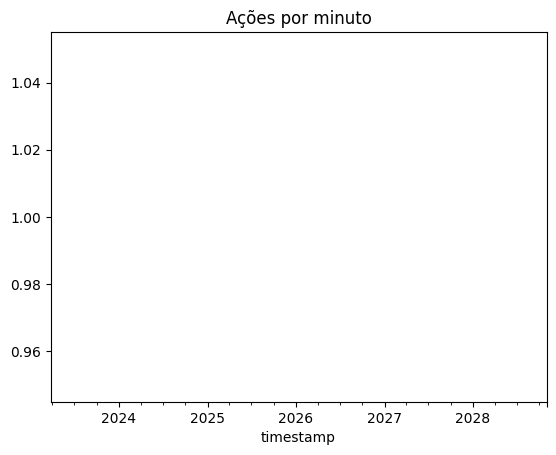

In [15]:
df.set_index("timestamp") \
  .resample("1min") \
  .size() \
  .plot(title="Ações por minuto")


## 4 - Existe padrão por usuário?

In [16]:
df.groupby("user_id").size().sort_values(ascending=False).head(10)


user_id
string    1
dtype: int64

## 5- Metadata

In [18]:
moves = df[df["action"] == "move"]

directions = (
    moves["metadata"]
    .dropna()
    .apply(lambda x: x.get("direction") if isinstance(x, dict) else None)
    .dropna()
)

if directions.empty:
    print("Nenhuma direção encontrada para ações 'move'")
else:
    directions.value_counts().plot(
        kind="bar",
        title="Direções mais usadas"
    )


Nenhuma direção encontrada para ações 'move'
